In [3]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt

# Reading the csv file
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
sentences = df['review'].values
y = df['label'].values

#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
max_review_len= max([len(s.split()) for s in sentences])
print(max_review_len)
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)
#sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

2470
Epoch 1/5
293/293 [==============================] - 203s 692ms/step - loss: 1.0572 - acc: 0.4890 - val_loss: 0.8675 - val_acc: 0.5013
Epoch 2/5
293/293 [==============================] - 199s 678ms/step - loss: 0.8276 - acc: 0.5395 - val_loss: 0.8590 - val_acc: 0.5014
Epoch 3/5
293/293 [==============================] - 192s 656ms/step - loss: 0.7352 - acc: 0.6270 - val_loss: 0.8874 - val_acc: 0.4975
Epoch 4/5
293/293 [==============================] - 195s 665ms/step - loss: 0.5924 - acc: 0.7339 - val_loss: 1.0021 - val_acc: 0.4832
Epoch 5/5
782/782 [==============================] - 30s 38ms/step - loss: 1.1475 - acc: 0.4782
Evaluation result on Test Data : Loss = 1.1475191116333008, accuracy = 0.4781999886035919


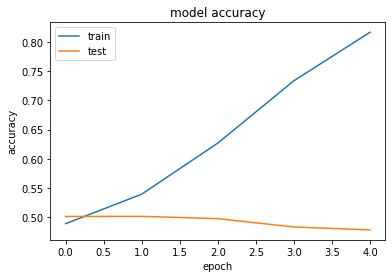

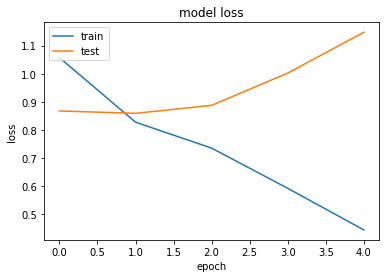

In [4]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
#Checking Sample Data and Predicted Data
predict_classe = model.predict_classes(X_test[[2],:])
print("Predicted value:",predict_classe[0])
print("Actual value:",y_test[2])

Predicted value: 1
Actual value: 1
